# *SOURCE*
https://www.youtube.com/watch?v=doDUihpj6ro&t=7339s
https://github.com/nicknochnack/ActionDetectionforSignLanguage

## **Install Dependency**

In [ ]:
! pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 KB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 13.8 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 opencv-python mediapipe 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully un

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Dropout
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
! git clone https://github.com/nickbp760/Tutorial_LSTM_MP.git

Cloning into 'Tutorial_LSTM_MP'...
remote: Enumerating objects: 50326, done.
remote: Counting objects: 100% (1794/1794), done.
remote: Compressing objects: 100% (1624/1624), done.
remote: Total 50326 (delta 1735), reused 220 (delta 170), pack-reused 48532
Receiving objects: 100% (50326/50326), 686.10 MiB | 16.19 MiB/s, done.
Resolving deltas: 100% (16855/16855), done.
Updating files: 100% (41832/41832), done.


In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    

## **Create Labels and Features**

The label map containts the action label

In [ ]:
# Actions that we try to detect
actions = np.array(['LirikKanan', 'LirikKiri', 'MenolehKanan', 'MenolehKiri', 'Normal', 'TutupMata'])
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

{'LirikKanan': 0,
 'LirikKiri': 1,
 'MenolehKanan': 2,
 'MenolehKiri': 3,
 'Normal': 4,
 'TutupMata': 5}

## **DEFINE X (Input) and y (Output)**

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/content/Tutorial_LSTM_MP/Real_CheatDataTrain') 

# Actions that we try to detect
actions = np.array(['LirikKanan', 'LirikKiri', 'MenolehKanan', 'MenolehKiri', 'Normal', 'TutupMata'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 50

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []

        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

X_train = np.array(sequences)
print(X_train.shape)
y_train = to_categorical(labels).astype(int)
print(y_train.shape)

(180, 50, 15)
(180, 6)


In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/content/Tutorial_LSTM_MP/Real_CheatDataTest') 

# Actions that we try to detect
actions = np.array(['LirikKanan', 'LirikKiri', 'MenolehKanan', 'MenolehKiri', 'Normal', 'TutupMata'])

# Thirty videos worth of data
no_sequences = 3

# Videos are going to be 30 frames in length
sequence_length = 50

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []

        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

X_Valid = np.array(sequences)
print(X_Valid.shape)
y_Valid = to_categorical(labels).astype(int)
print(y_Valid.shape)

(18, 50, 15)
(18, 6)


In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/content/Tutorial_LSTM_MP/Complete_CheatDataNiko') 

# Actions that we try to detect
actions = np.array(['LirikKanan', 'LirikKiri', 'MenolehKanan', 'MenolehKiri', 'Normal', 'TutupMata'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 50

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []

        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

X_test = np.array(sequences)
print(X_test.shape)
y_test = to_categorical(labels).astype(int)
print(y_test.shape)

(180, 50, 15)
(180, 6)


## **Build, Train and Test Neural Network**

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(50,15)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.optimizer.lr.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [ ]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback], validation_data = (X_Valid, y_Valid))

Epoch 1/100
6/6 [==============================] - 10s 337ms/step - loss: 1.7869 - categorical_accuracy: 0.2667 - val_loss: 1.7709 - val_categorical_accuracy: 0.4444
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 1.7511 - categorical_accuracy: 0.3889 - val_loss: 1.7289 - val_categorical_accuracy: 0.5000
Epoch 3/100
6/6 [==============================] - 0s 26ms/step - loss: 1.7141 - categorical_accuracy: 0.4333 - val_loss: 1.6845 - val_categorical_accuracy: 0.5000
Epoch 4/100
6/6 [==============================] - 0s 24ms/step - loss: 1.6753 - categorical_accuracy: 0.4611 - val_loss: 1.6364 - val_categorical_accuracy: 0.5000
Epoch 5/100
6/6 [==============================] - 0s 24ms/step - loss: 1.6318 - categorical_accuracy: 0.5444 - val_loss: 1.5855 - val_categorical_accuracy: 0.5000
Epoch 6/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5745 - categorical_accuracy: 0.5500 - val_loss: 1.5310 - val_categorical_accuracy: 0.5000
Epoch 7/100
6/

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 128)           73728     
                                                                 
 dropout (Dropout)           (None, 50, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 50, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2

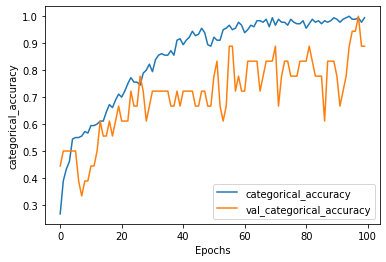

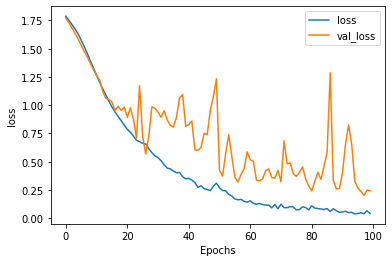

In [ ]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionGRUNikoCheatDataReal_ReportLSTM.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

In [ ]:
y_test_predict = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(y_test_predict, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)
accuracy_score(ytrue, yhat)

0.8944444444444445

## **Build, Train and Test Neural Network 2**

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, activation='tanh', input_shape=(50,15)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.optimizer.lr.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [ ]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback], validation_data = (X_Valid, y_Valid))

Epoch 1/100
6/6 [==============================] - 6s 237ms/step - loss: 1.7659 - categorical_accuracy: 0.2722 - val_loss: 1.7462 - val_categorical_accuracy: 0.3333
Epoch 2/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6955 - categorical_accuracy: 0.5833 - val_loss: 1.6768 - val_categorical_accuracy: 0.3333
Epoch 3/100
6/6 [==============================] - 0s 23ms/step - loss: 1.6279 - categorical_accuracy: 0.6333 - val_loss: 1.5938 - val_categorical_accuracy: 0.5000
Epoch 4/100
6/6 [==============================] - 0s 23ms/step - loss: 1.5471 - categorical_accuracy: 0.6667 - val_loss: 1.5184 - val_categorical_accuracy: 0.5000
Epoch 5/100
6/6 [==============================] - 0s 24ms/step - loss: 1.4726 - categorical_accuracy: 0.6111 - val_loss: 1.4403 - val_categorical_accuracy: 0.5000
Epoch 6/100
6/6 [==============================] - 0s 22ms/step - loss: 1.3905 - categorical_accuracy: 0.6056 - val_loss: 1.3390 - val_categorical_accuracy: 0.6111
Epoch 7/100
6/6

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 256)           278528    
                                                                 
 dropout_2 (Dropout)         (None, 50, 256)           0         
                                                                 
 lstm_4 (LSTM)               (None, 50, 128)           197120    
                                                                 
 dropout_3 (Dropout)         (None, 50, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)               

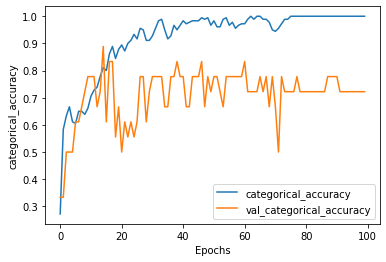

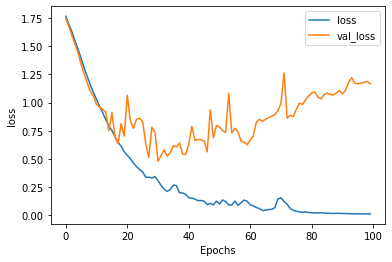

In [ ]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionGRUNikoCheatDataReal_ReportLSTM2.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

In [ ]:
y_test_predict = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(y_test_predict, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)
accuracy_score(ytrue, yhat)

0.8555555555555555

## **Build, Train and Test Neural Network 3**

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(50,15)))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.optimizer.lr.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [ ]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback], validation_data = (X_Valid, y_Valid))

Epoch 1/100
6/6 [==============================] - 8s 350ms/step - loss: 1.7481 - categorical_accuracy: 0.3111 - val_loss: 1.6773 - val_categorical_accuracy: 0.6667
Epoch 2/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6481 - categorical_accuracy: 0.5722 - val_loss: 1.5988 - val_categorical_accuracy: 0.7778
Epoch 3/100
6/6 [==============================] - 0s 23ms/step - loss: 1.5432 - categorical_accuracy: 0.6278 - val_loss: 1.5000 - val_categorical_accuracy: 0.7222
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 1.4343 - categorical_accuracy: 0.6611 - val_loss: 1.3955 - val_categorical_accuracy: 0.6667
Epoch 5/100
6/6 [==============================] - 0s 21ms/step - loss: 1.3252 - categorical_accuracy: 0.6611 - val_loss: 1.2698 - val_categorical_accuracy: 0.6667
Epoch 6/100
6/6 [==============================] - 0s 20ms/step - loss: 1.2097 - categorical_accuracy: 0.6778 - val_loss: 1.1347 - val_categorical_accuracy: 0.8333
Epoch 7/100
6/6

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 128)           73728     
                                                                 
 dropout_4 (Dropout)         (None, 50, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 50, 256)           394240    
                                                                 
 dropout_5 (Dropout)         (None, 50, 256)           0         
                                                                 
 lstm_8 (LSTM)               (None, 128)               197120    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)               

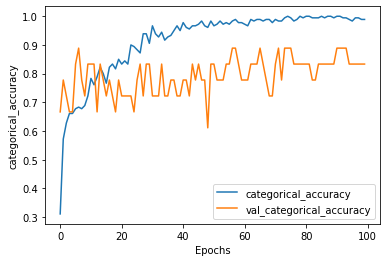

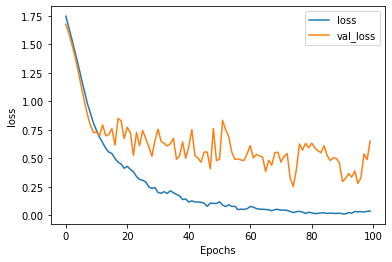

In [ ]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionGRUNikoCheatDataReal_ReportLSTM3.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

In [ ]:
y_test_predict = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(y_test_predict, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)
accuracy_score(ytrue, yhat)

0.7166666666666667